In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import scFates as scf
scv.set_figure_params(figsize=(3,3))
scf.set_figure_pubready()

In [2]:
adata=sc.read("data/adata_aligned.h5ad")

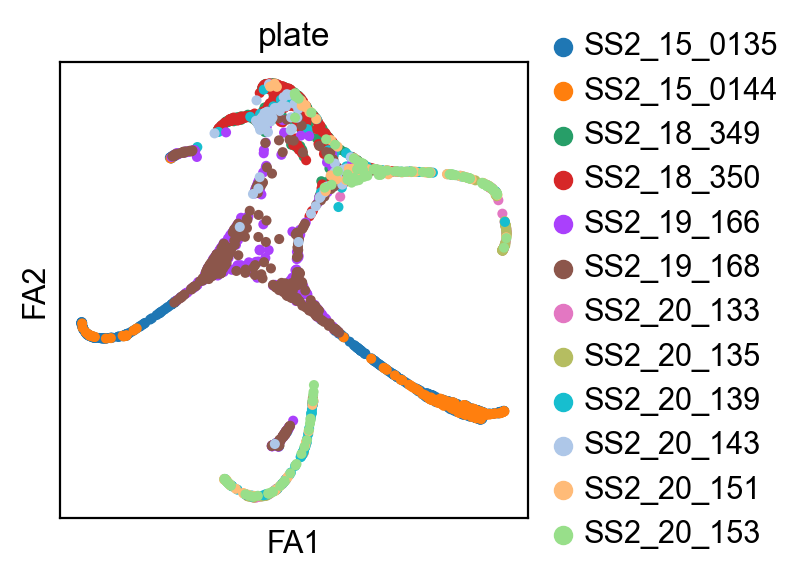

In [3]:
sc.pl.draw_graph(adata,color="plate")

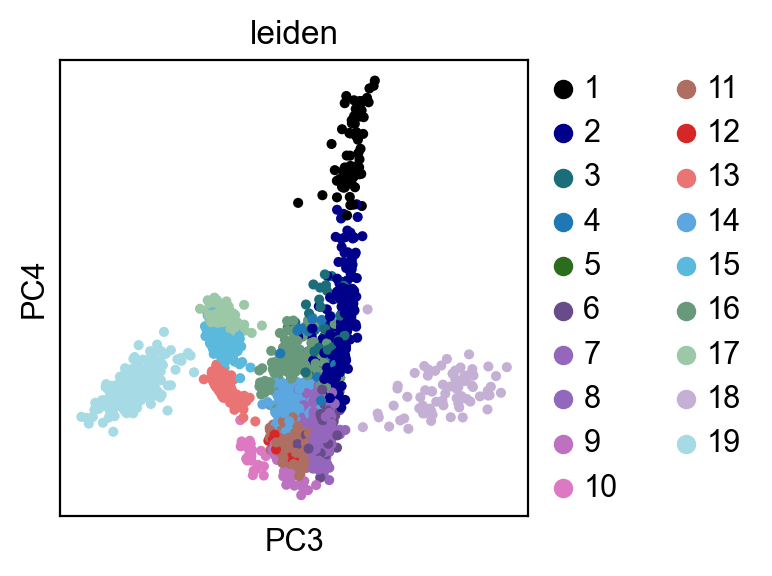

In [4]:
sc.pl.pca(adata,color= "leiden",components=[3,4])

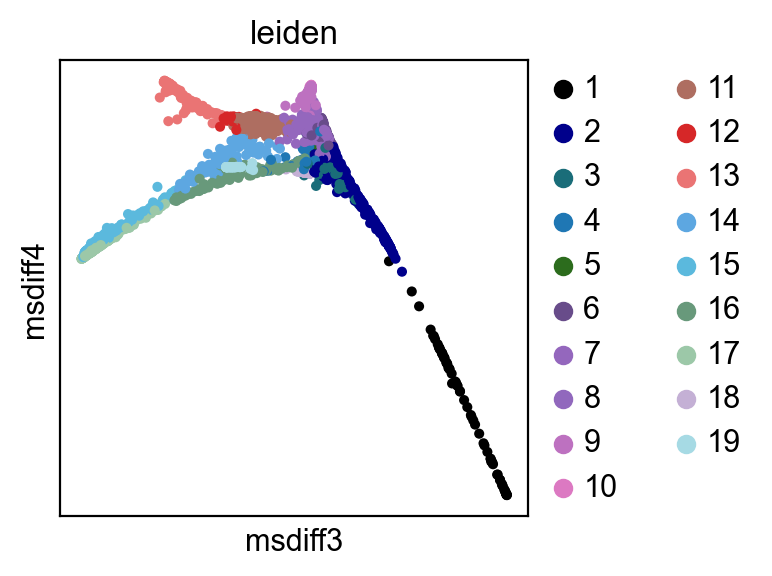

In [5]:
sc.pl.embedding(adata,basis="msdiff",color= "leiden",components=[3,4])

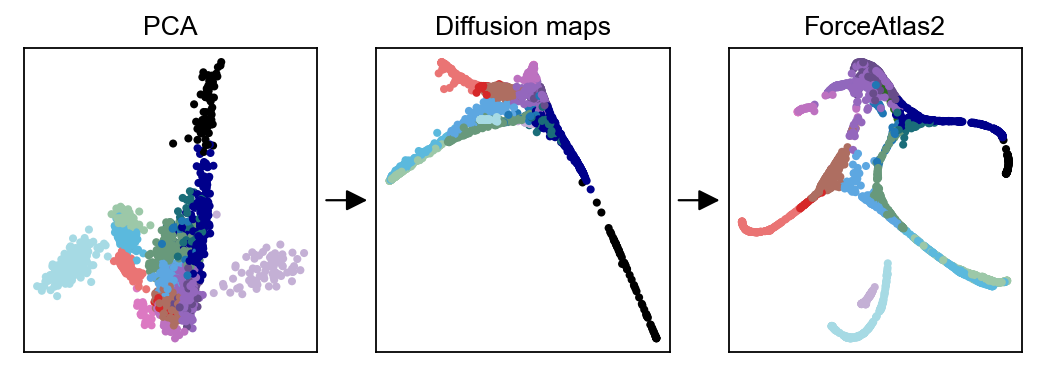

In [6]:
sc.set_figure_params(frameon=True)
from matplotlib.patches import ConnectionPatch

fig, axes = plt.subplots(1, 3,figsize=(8, 2.5))
sc.pl.pca(adata,color="leiden",legend_loc="none",ax=axes[0],components=[3,4],show=False,title="")
axes[0].set_title("PCA",fontsize=12)
sc.pl.embedding(adata,basis="msdiff",color= "leiden",legend_loc="none",
                components=[3,4],ax=axes[1],show=False,title="")
axes[1].set_title("Diffusion maps",fontsize=12)
#sc.pl.tsne(adata,color="leiden",legend_loc="none",ax=axes[2],show=False,title="tSNE")
sc.pl.draw_graph(adata,color="leiden",legend_loc="none",ax=axes[2],show=False,title="")
axes[2].set_title("ForceAtlas2",fontsize=12)
for ax in axes:
    ax.set_ylabel("")
    ax.set_xlabel("")
    
coordsA = "axe fractions"
coordsB = "axe fractions"
con = ConnectionPatch((1,.5), (0,.5), 
                      coordsA=axes[0].transAxes, 
                      coordsB=axes[1].transAxes,
                      arrowstyle="-|>", shrinkA=4, shrinkB=4,
                      mutation_scale=20, fc="k")
axes[0].add_artist(con)

con = ConnectionPatch((1,.5), (0,.5), 
                      coordsA=axes[1].transAxes, 
                      coordsB=axes[2].transAxes,
                      arrowstyle="-|>", shrinkA=4, shrinkB=4,
                      mutation_scale=20, fc="k")
axes[1].add_artist(con)


plt.savefig("figures/suppfig1-A.pdf",dpi=300)

In [7]:
adata.obs.plate.cat.categories

Index(['SS2_15_0135', 'SS2_15_0144', 'SS2_18_349', 'SS2_18_350', 'SS2_19_166',
       'SS2_19_168', 'SS2_20_133', 'SS2_20_135', 'SS2_20_139', 'SS2_20_143',
       'SS2_20_151', 'SS2_20_153'],
      dtype='object')

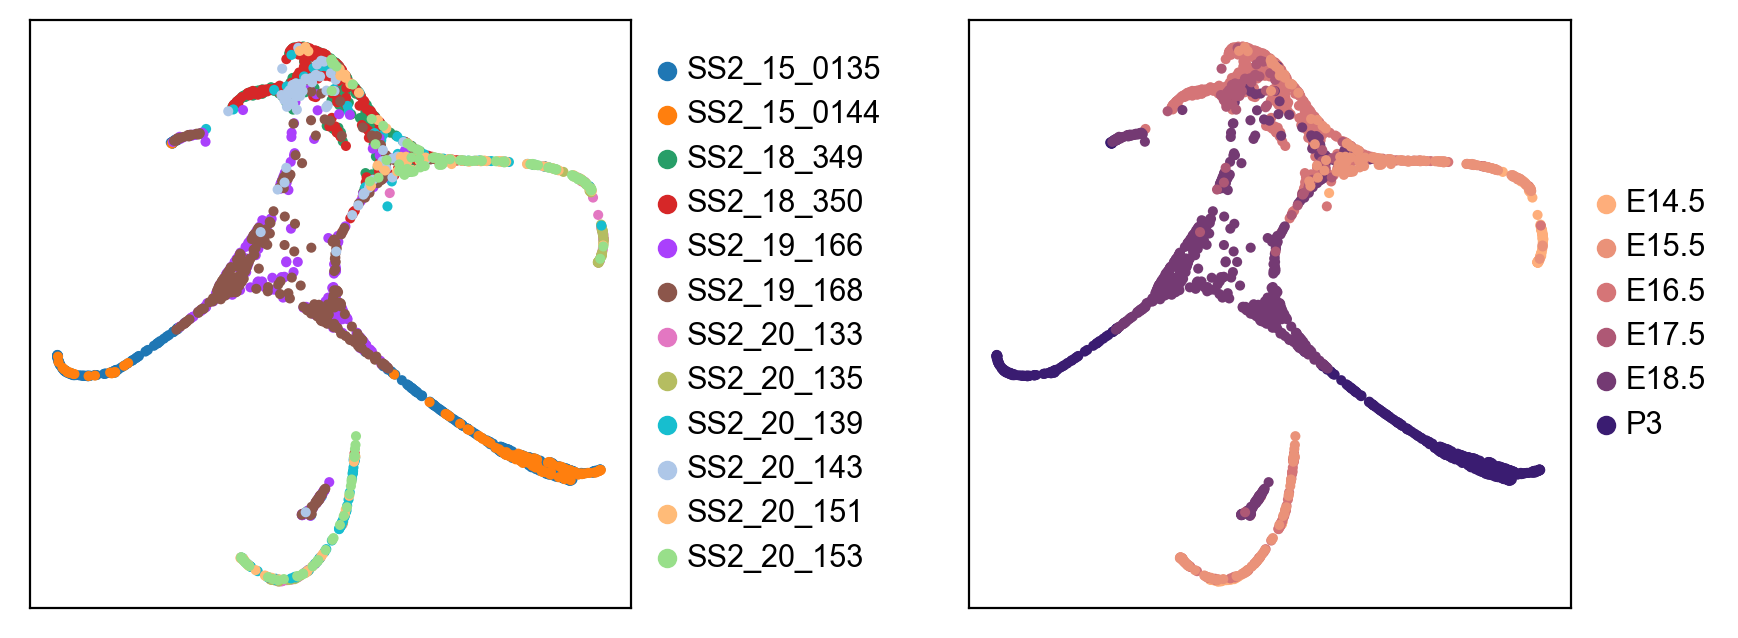

In [8]:
scv.set_figure_params(dpi_save=300,figsize=(3.5,3.5))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(9,3.5))
sc.pl.draw_graph(adata,color="plate",cmap="viridis",ax=ax1,show=False,sort_order=True,title="")
sc.pl.draw_graph(adata,color="devtime",cmap="viridis",ax=ax2,show=False,sort_order=True,title="")
plt.tight_layout()
for ax in (ax1,ax2):
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.savefig('figures/suppfig1-B.pdf',bbox_inches="tight")

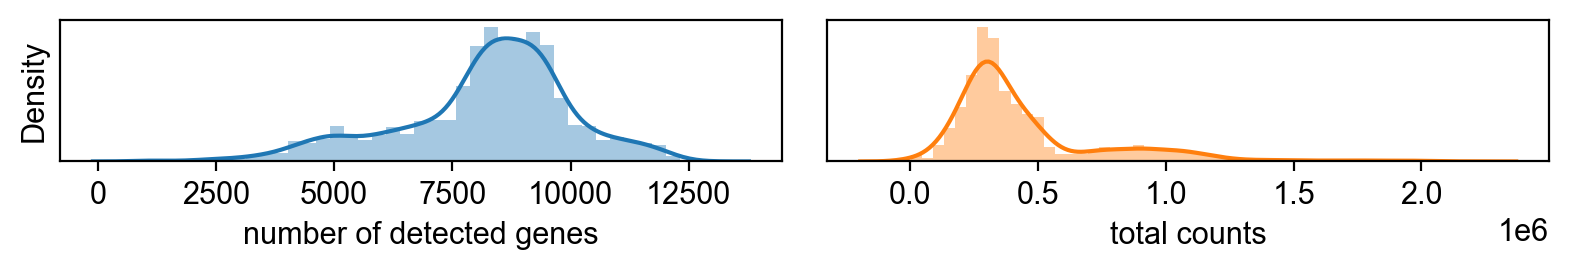

In [9]:
import seaborn as sns
custom_palette = sns.color_palette()
qc=adata.obs
fig, axes = plt.subplots(1, 2,figsize=(8, 1.5))
sns.distplot(qc.n_genes_by_counts,ax=axes[0])
axes[0].set_xlabel("number of detected genes")
sns.distplot(qc.total_counts,ax=axes[1],color=custom_palette[1])
plt.xlabel("total counts")
plt.ylabel("")
axes[0].set_yticks([])
axes[1].set_yticks([])
plt.ticklabel_format(axis="x",style="sci")
plt.tight_layout()
plt.savefig("figures/suppfig1-C.pdf",dpi=300)

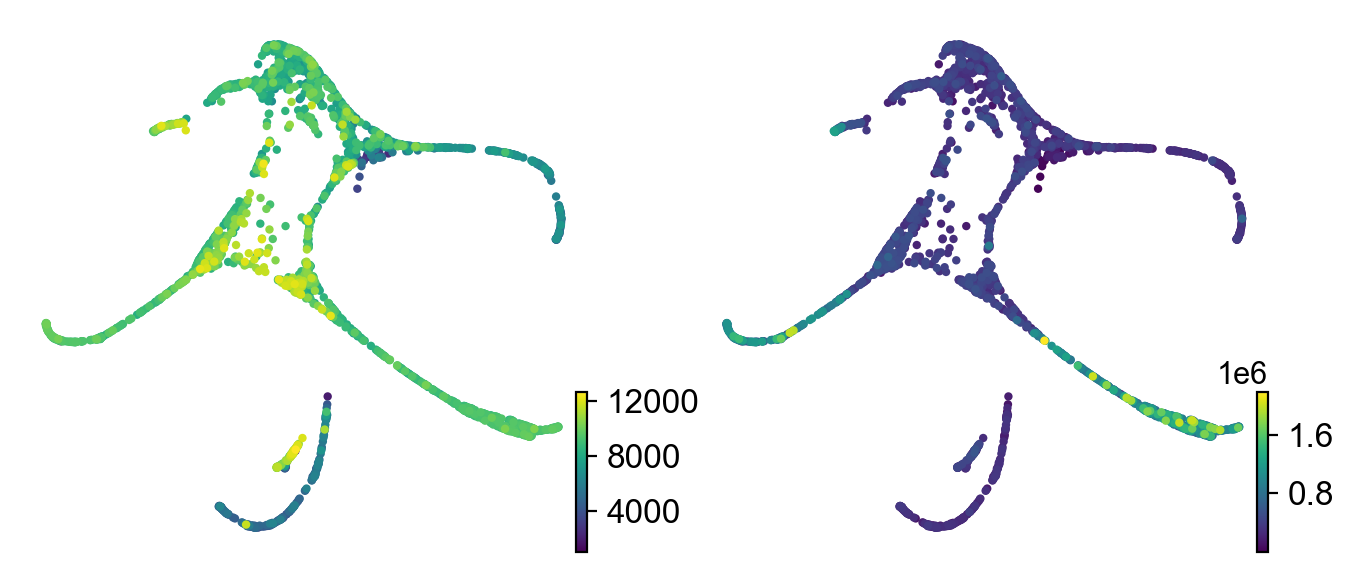

In [10]:
scv.set_figure_params(dpi_save=300,figsize=(3.5,3.5))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3.5))
scv.pl.draw_graph(adata,color="n_genes_by_counts",cmap="viridis",ax=ax1,show=False,sort_order=True,title="")
scv.pl.draw_graph(adata,color="total_counts",cmap="viridis",ax=ax2,show=False,sort_order=True,title="")
plt.savefig('figures/suppfig1-D.pdf',bbox_inches="tight")


In [11]:
fname = "suppfig1"

In [12]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass{article}
\usepackage{geometry}
 \geometry{
 left=10mm,
 right=10mm,
 top=10mm,
 bottom=10mm,
 }

\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\pagenumbering{gobble}

\begin{document}
\setmainfont{Arial}

\large

\\raggedright \textbf{A} Generation of diffusion space from PCA, followed by 2D ForceAtlas2 embedding
\center \includegraphics[width=.9\linewidth]{figures/suppfig1-A.pdf}

\\raggedright \textbf{B} Plates and developmental time repartition
\center \includegraphics[width=.9\linewidth]{figures/suppfig1-B.pdf}

\\raggedright \textbf{C} Characteristics of the filtered dataset
\center \includegraphics[width=.9\linewidth]{figures/suppfig1-C.pdf}
\center \includegraphics[width=.9\linewidth]{figures/suppfig1-D.pdf}
\hfill
\clearpage
EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.aux 
convert -flatten -density 300 $1.pdf $1.jpg


identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppfig1.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-xdvipdfmx.def)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
(

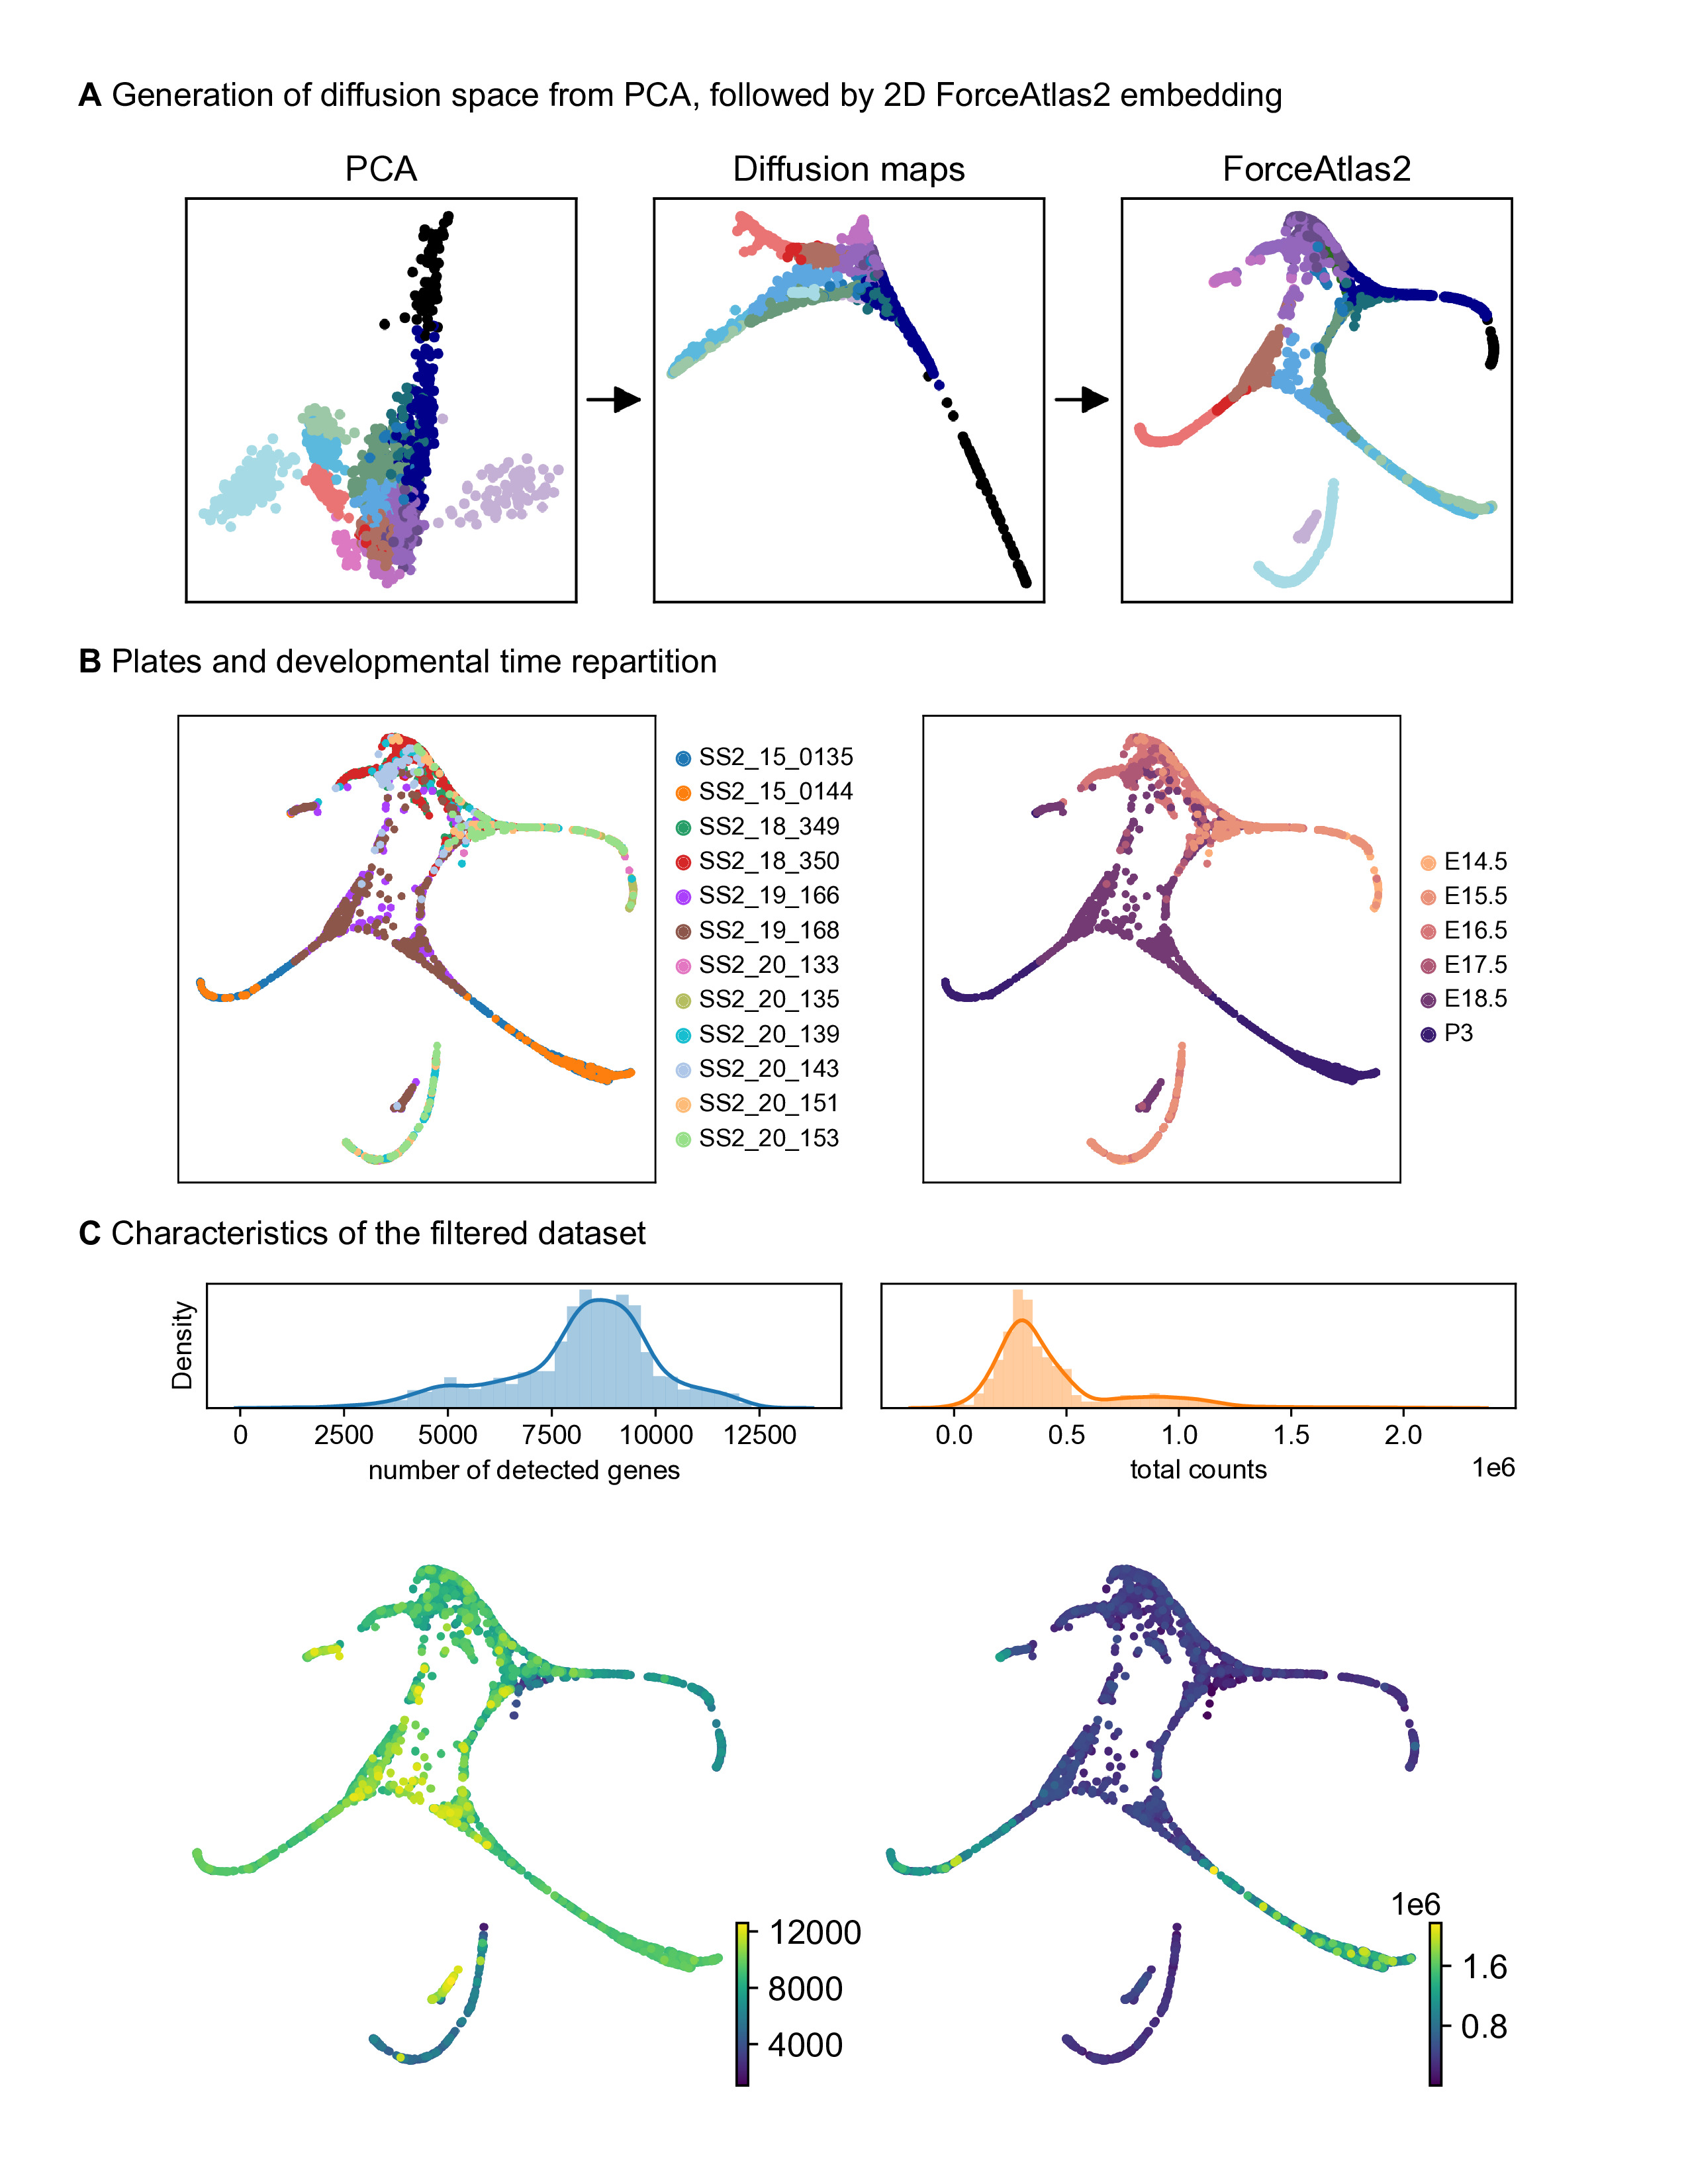

In [13]:
from IPython.display import Image
Image(filename=fname+'.jpg') 

In [14]:
genes=["Actl6b","Map2","Gap43","Uchl1","Gfi1","Pou4f3","Cib2","Xirp2","Myo6","Cxcl14","Pou3f4","Tbx18","Tbx1","Car3"]

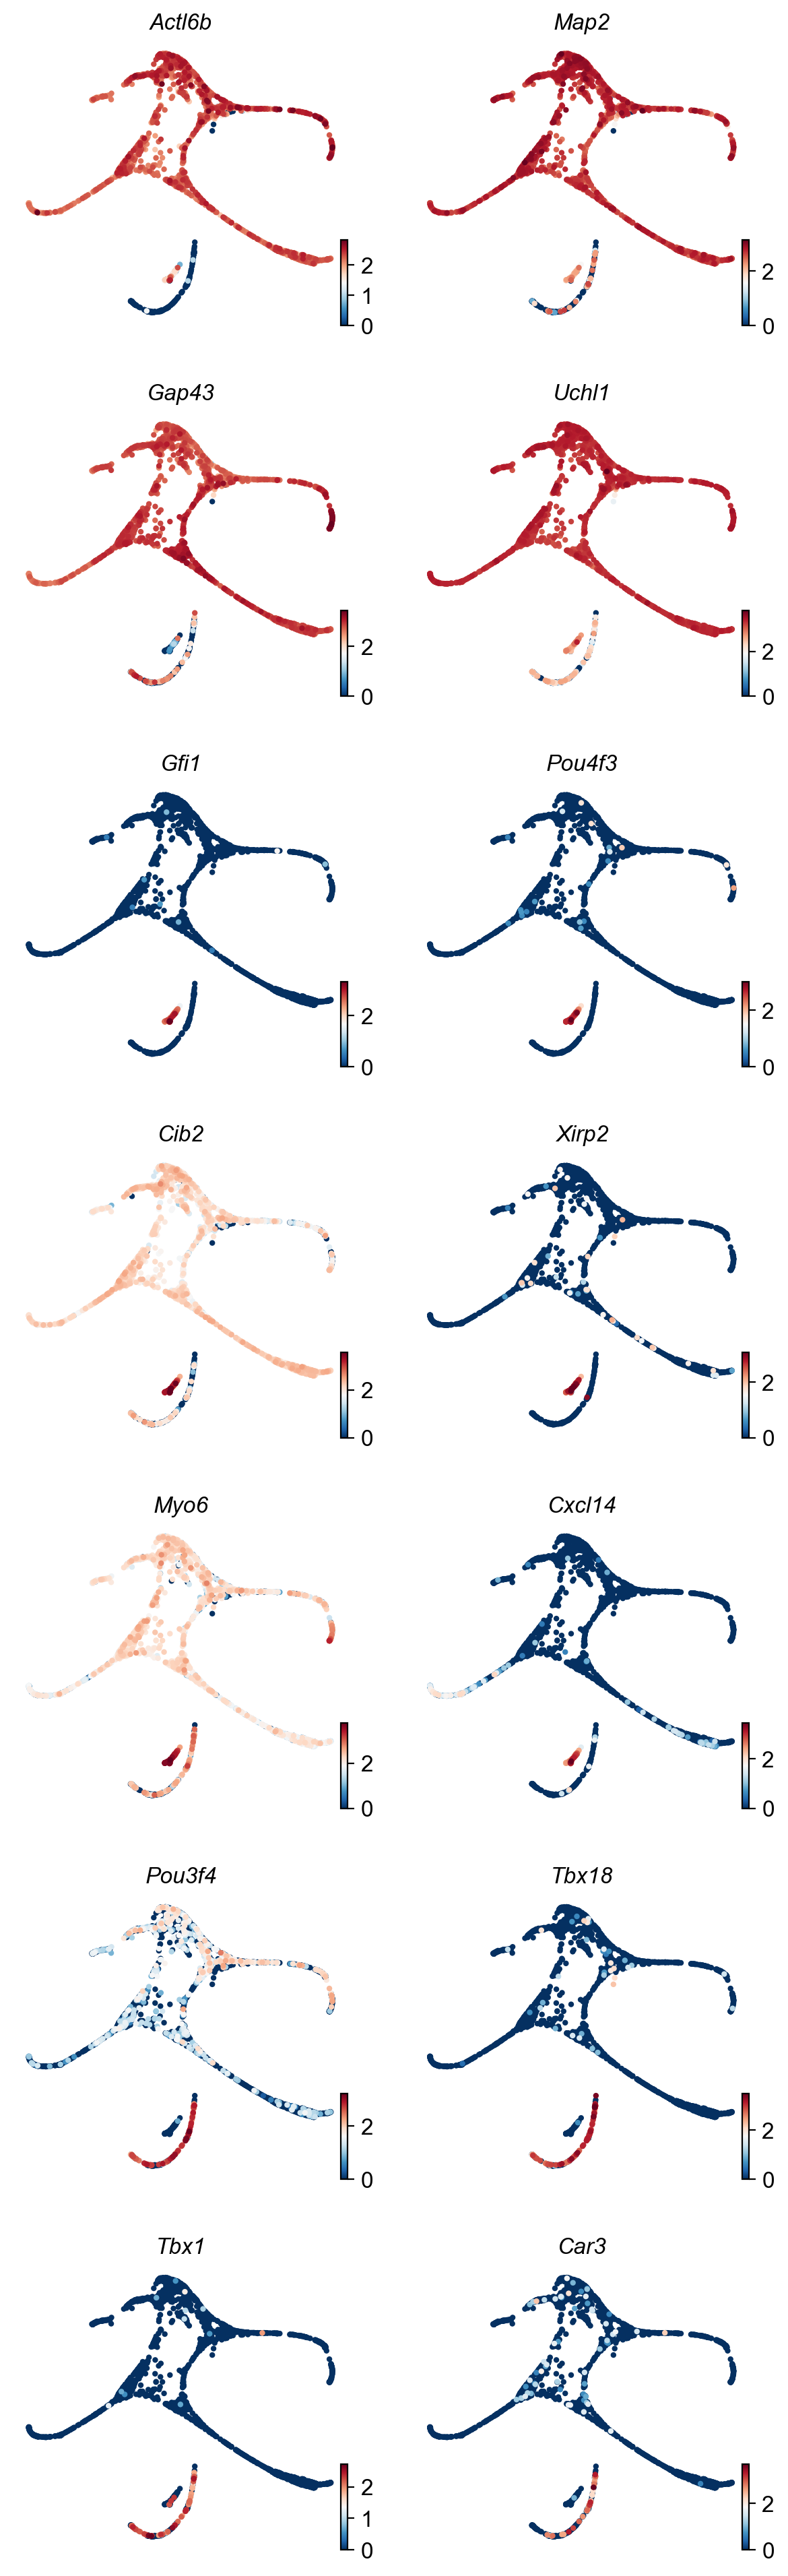

In [15]:
scv.set_figure_params(dpi_save=300,figsize=(3.5,3.5))
axs=scv.pl.draw_graph(adata,color=genes,ncols=2,show=False)
for g,ax in zip(genes,axs):
    ax.set_title(g,style="italic")
plt.savefig("figures/supp1_genes.pdf")

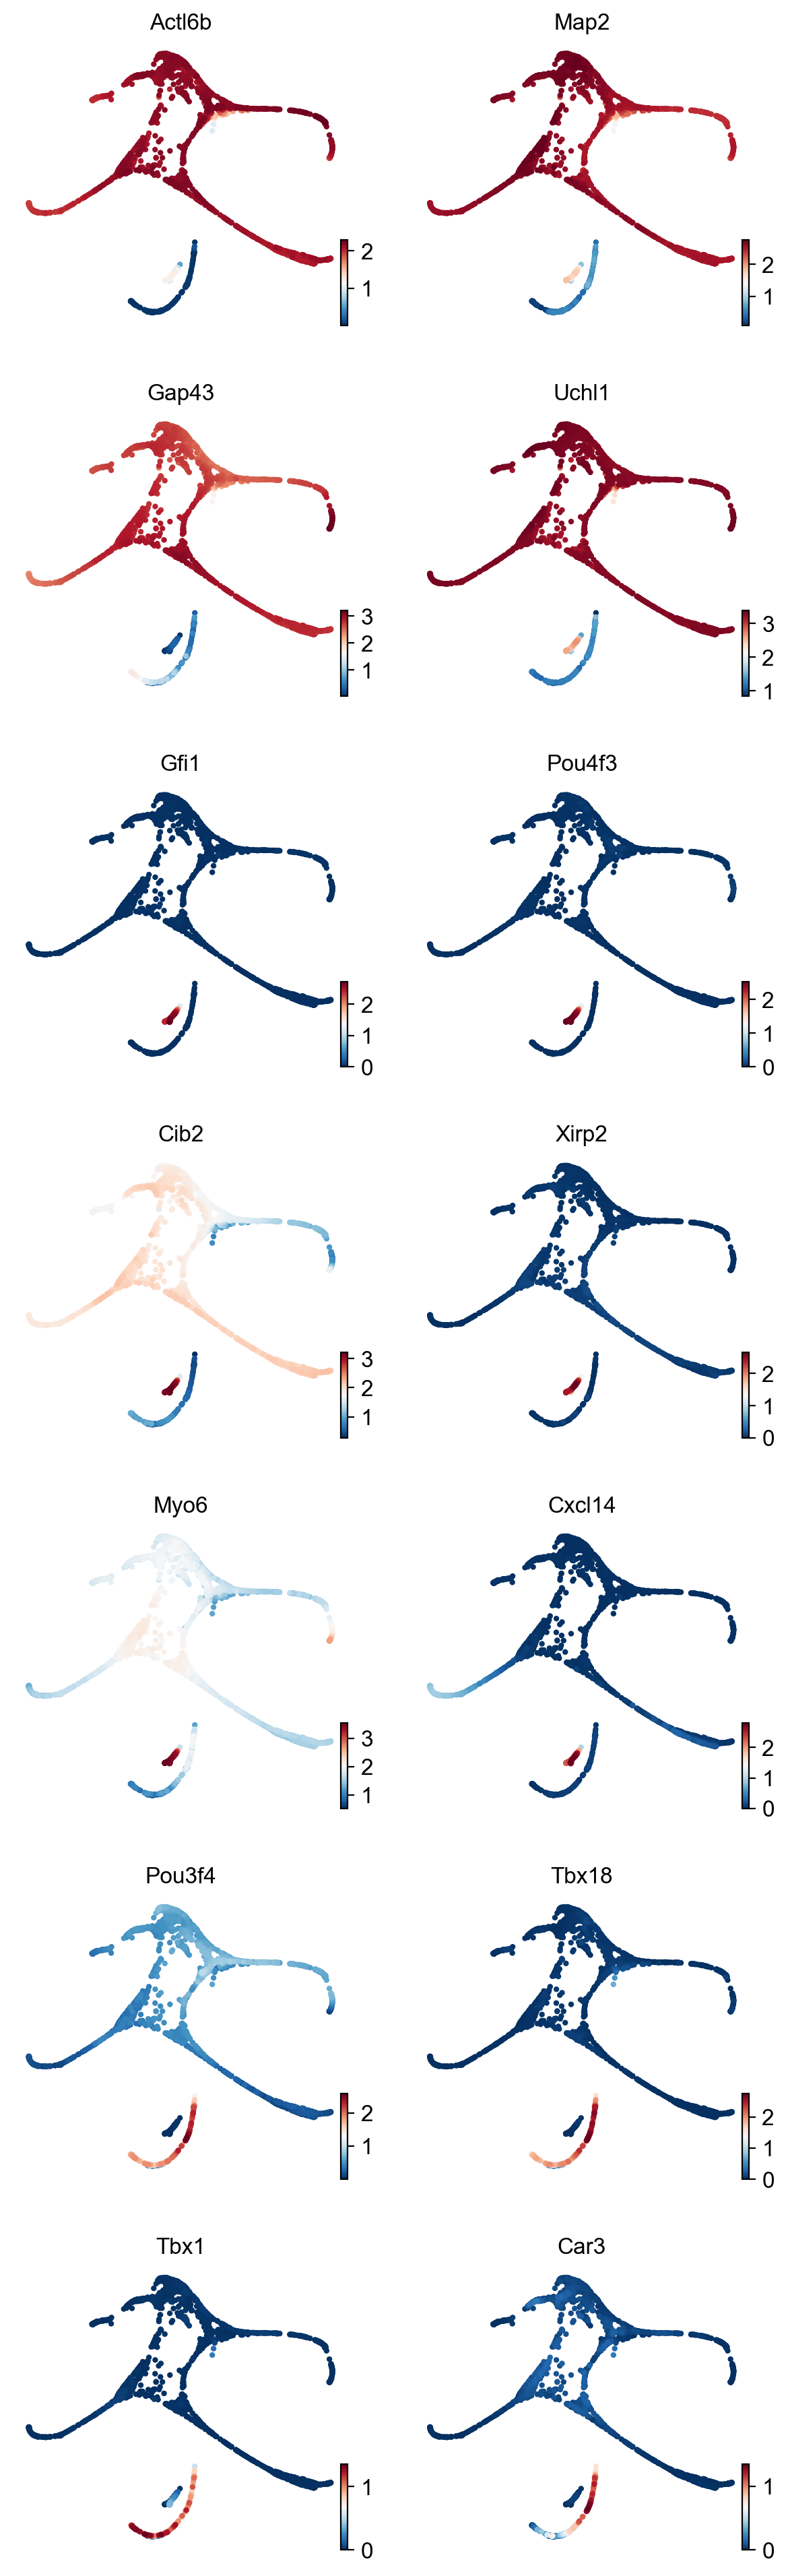

In [16]:
scv.pl.draw_graph(adata,color=genes,title=genes,ncols=2,layer="palantir_imp",show=False)
for g,ax in zip(genes,axs):
    ax.set_title(g,style="italic")
plt.savefig("figures/supp1_genes_imp.pdf")

In [17]:
fname = "suppfile1"

In [18]:
%%bash -s $fname
cat<<EOF >$1.tex
\documentclass{article}
\usepackage{geometry}
 \geometry{
 left=10mm,
 right=10mm,
 top=10mm,
 bottom=10mm,
 }

\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\pagenumbering{gobble}

\begin{document}
\setmainfont{Arial}

\large

\begin{minipage}[t]{.48\textwidth}
\\raggedright \textbf{A} Marker expression, log-normalised
\center \includegraphics[width=.8\linewidth]{figures/supp1_genes.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.48\textwidth}
\\raggedright \textbf{B} Marker expression, MAGIC imputed
\center \includegraphics[width=.8\linewidth]{figures/supp1_genes_imp.pdf}
\end{minipage}\hfill
\clearpage
EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.aux 
convert -flatten -density 300 $1.pdf $1.jpg


identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppfile1.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-xdvipdfmx.def)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty


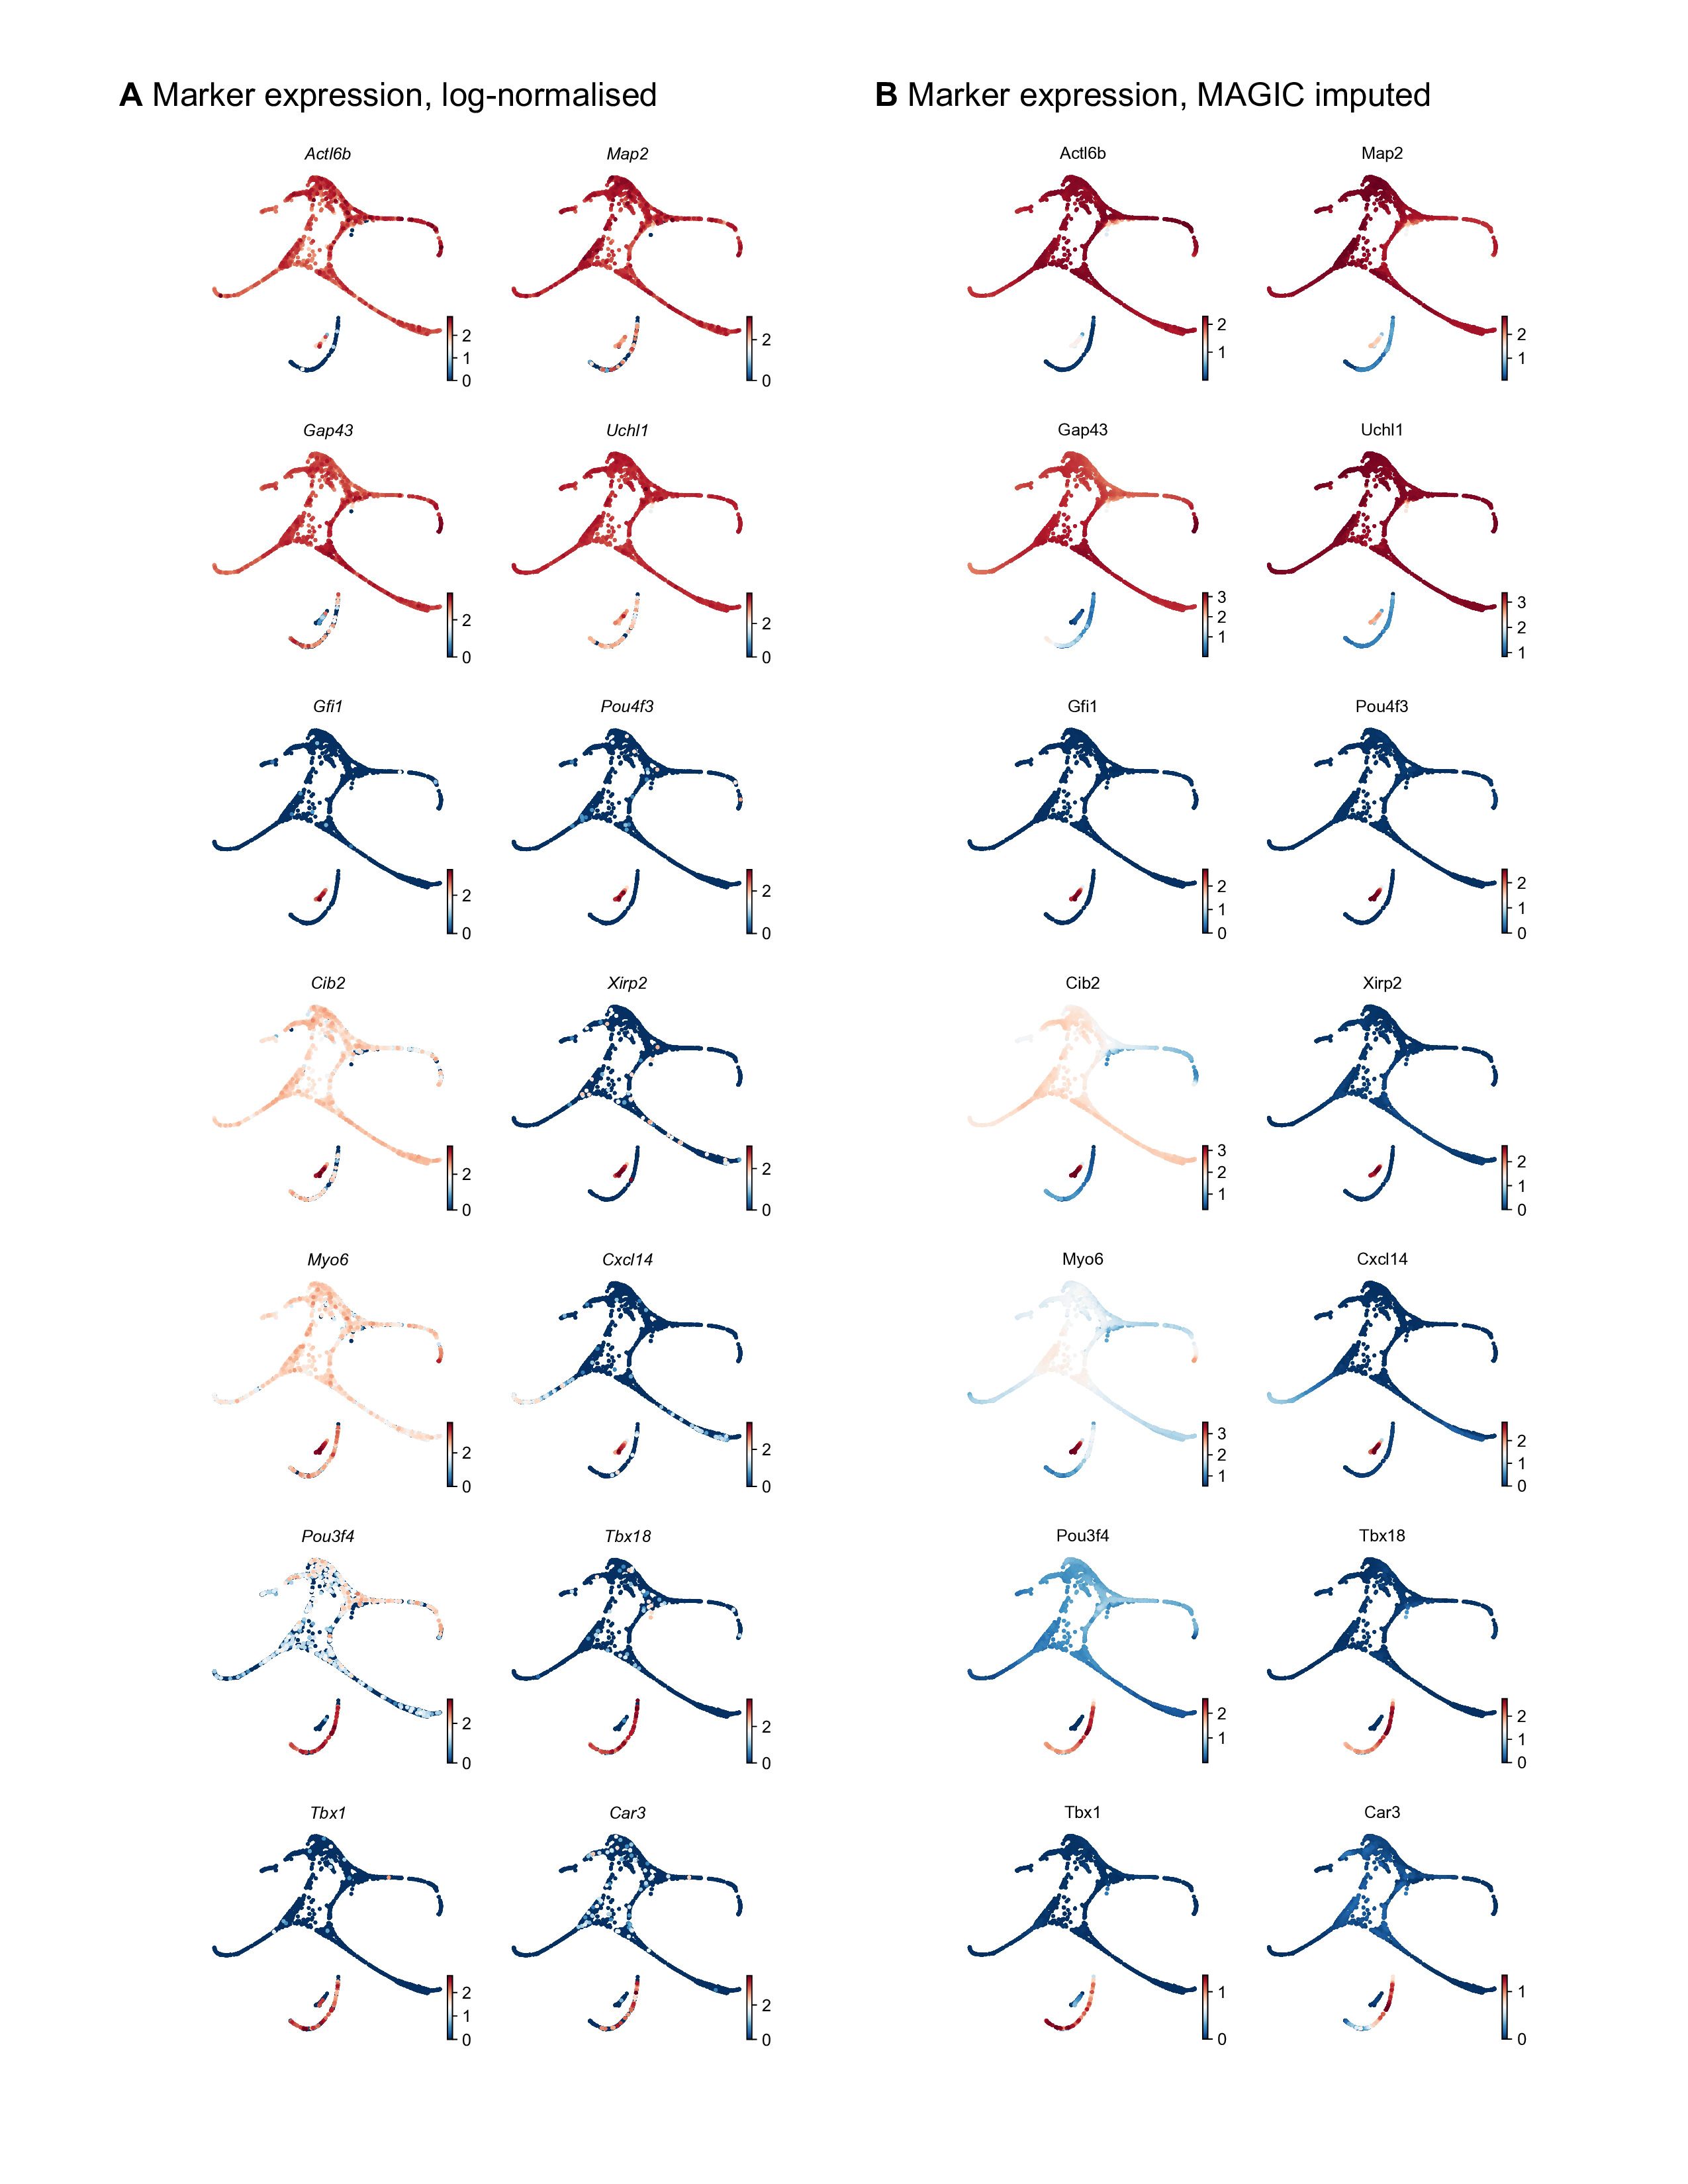

In [19]:
from IPython.display import Image
Image(filename=fname+'.jpg') 

In [20]:
adata=sc.read("data/adata_tree_fitted.h5ad")

In [21]:
adata=adata.raw.to_adata()

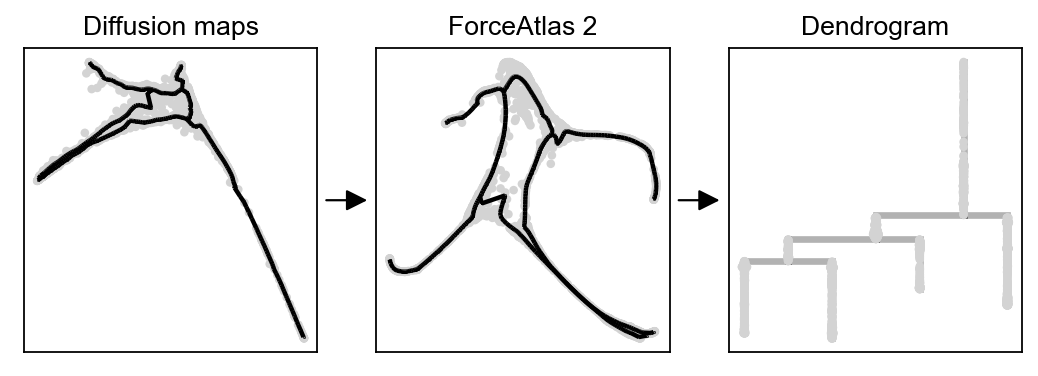

In [22]:
sc.set_figure_params(frameon=True)
from matplotlib.patches import ConnectionPatch

fig, axes = plt.subplots(1, 3,figsize=(8, 2.5))

scf.pl.graph(adata,basis="msdiff",tips=False,forks=False,
             size_nodes=.1,components=[3,4],ax=axes[0],show=False,title="")

axes[0].set_title("Diffusion maps",fontsize=12)
#sc.pl.tsne(adata,color="leiden",legend_loc="none",ax=axes[2],show=False,title="tSNE")
scf.pl.graph(adata,basis="draw_graph_fa",tips=False,forks=False,
             size_nodes=.1,ax=axes[1],show=False,title="")
axes[1].set_title("ForceAtlas 2",fontsize=12)
scf.pl.dendrogram(adata,ax=axes[2],show=False,title="",tree_behind=True)
axes[2].set_title("Dendrogram",fontsize=12)
for ax in axes:
    ax.set_ylabel("")
    ax.set_xlabel("")
    
coordsA = "axe fractions"
coordsB = "axe fractions"
con = ConnectionPatch((1,.5), (0,.5), 
                      coordsA=axes[0].transAxes, 
                      coordsB=axes[1].transAxes,
                      arrowstyle="-|>", shrinkA=4, shrinkB=4,
                      mutation_scale=20, fc="k")
axes[0].add_artist(con)

con = ConnectionPatch((1,.5), (0,.5), 
                      coordsA=axes[1].transAxes, 
                      coordsB=axes[2].transAxes,
                      arrowstyle="-|>", shrinkA=4, shrinkB=4,
                      mutation_scale=20, fc="k")
axes[1].add_artist(con)


plt.savefig("figures/suppfig2-A.pdf",dpi=300)

saving figure to file ./figures/scvelo_suppfig2.pdf


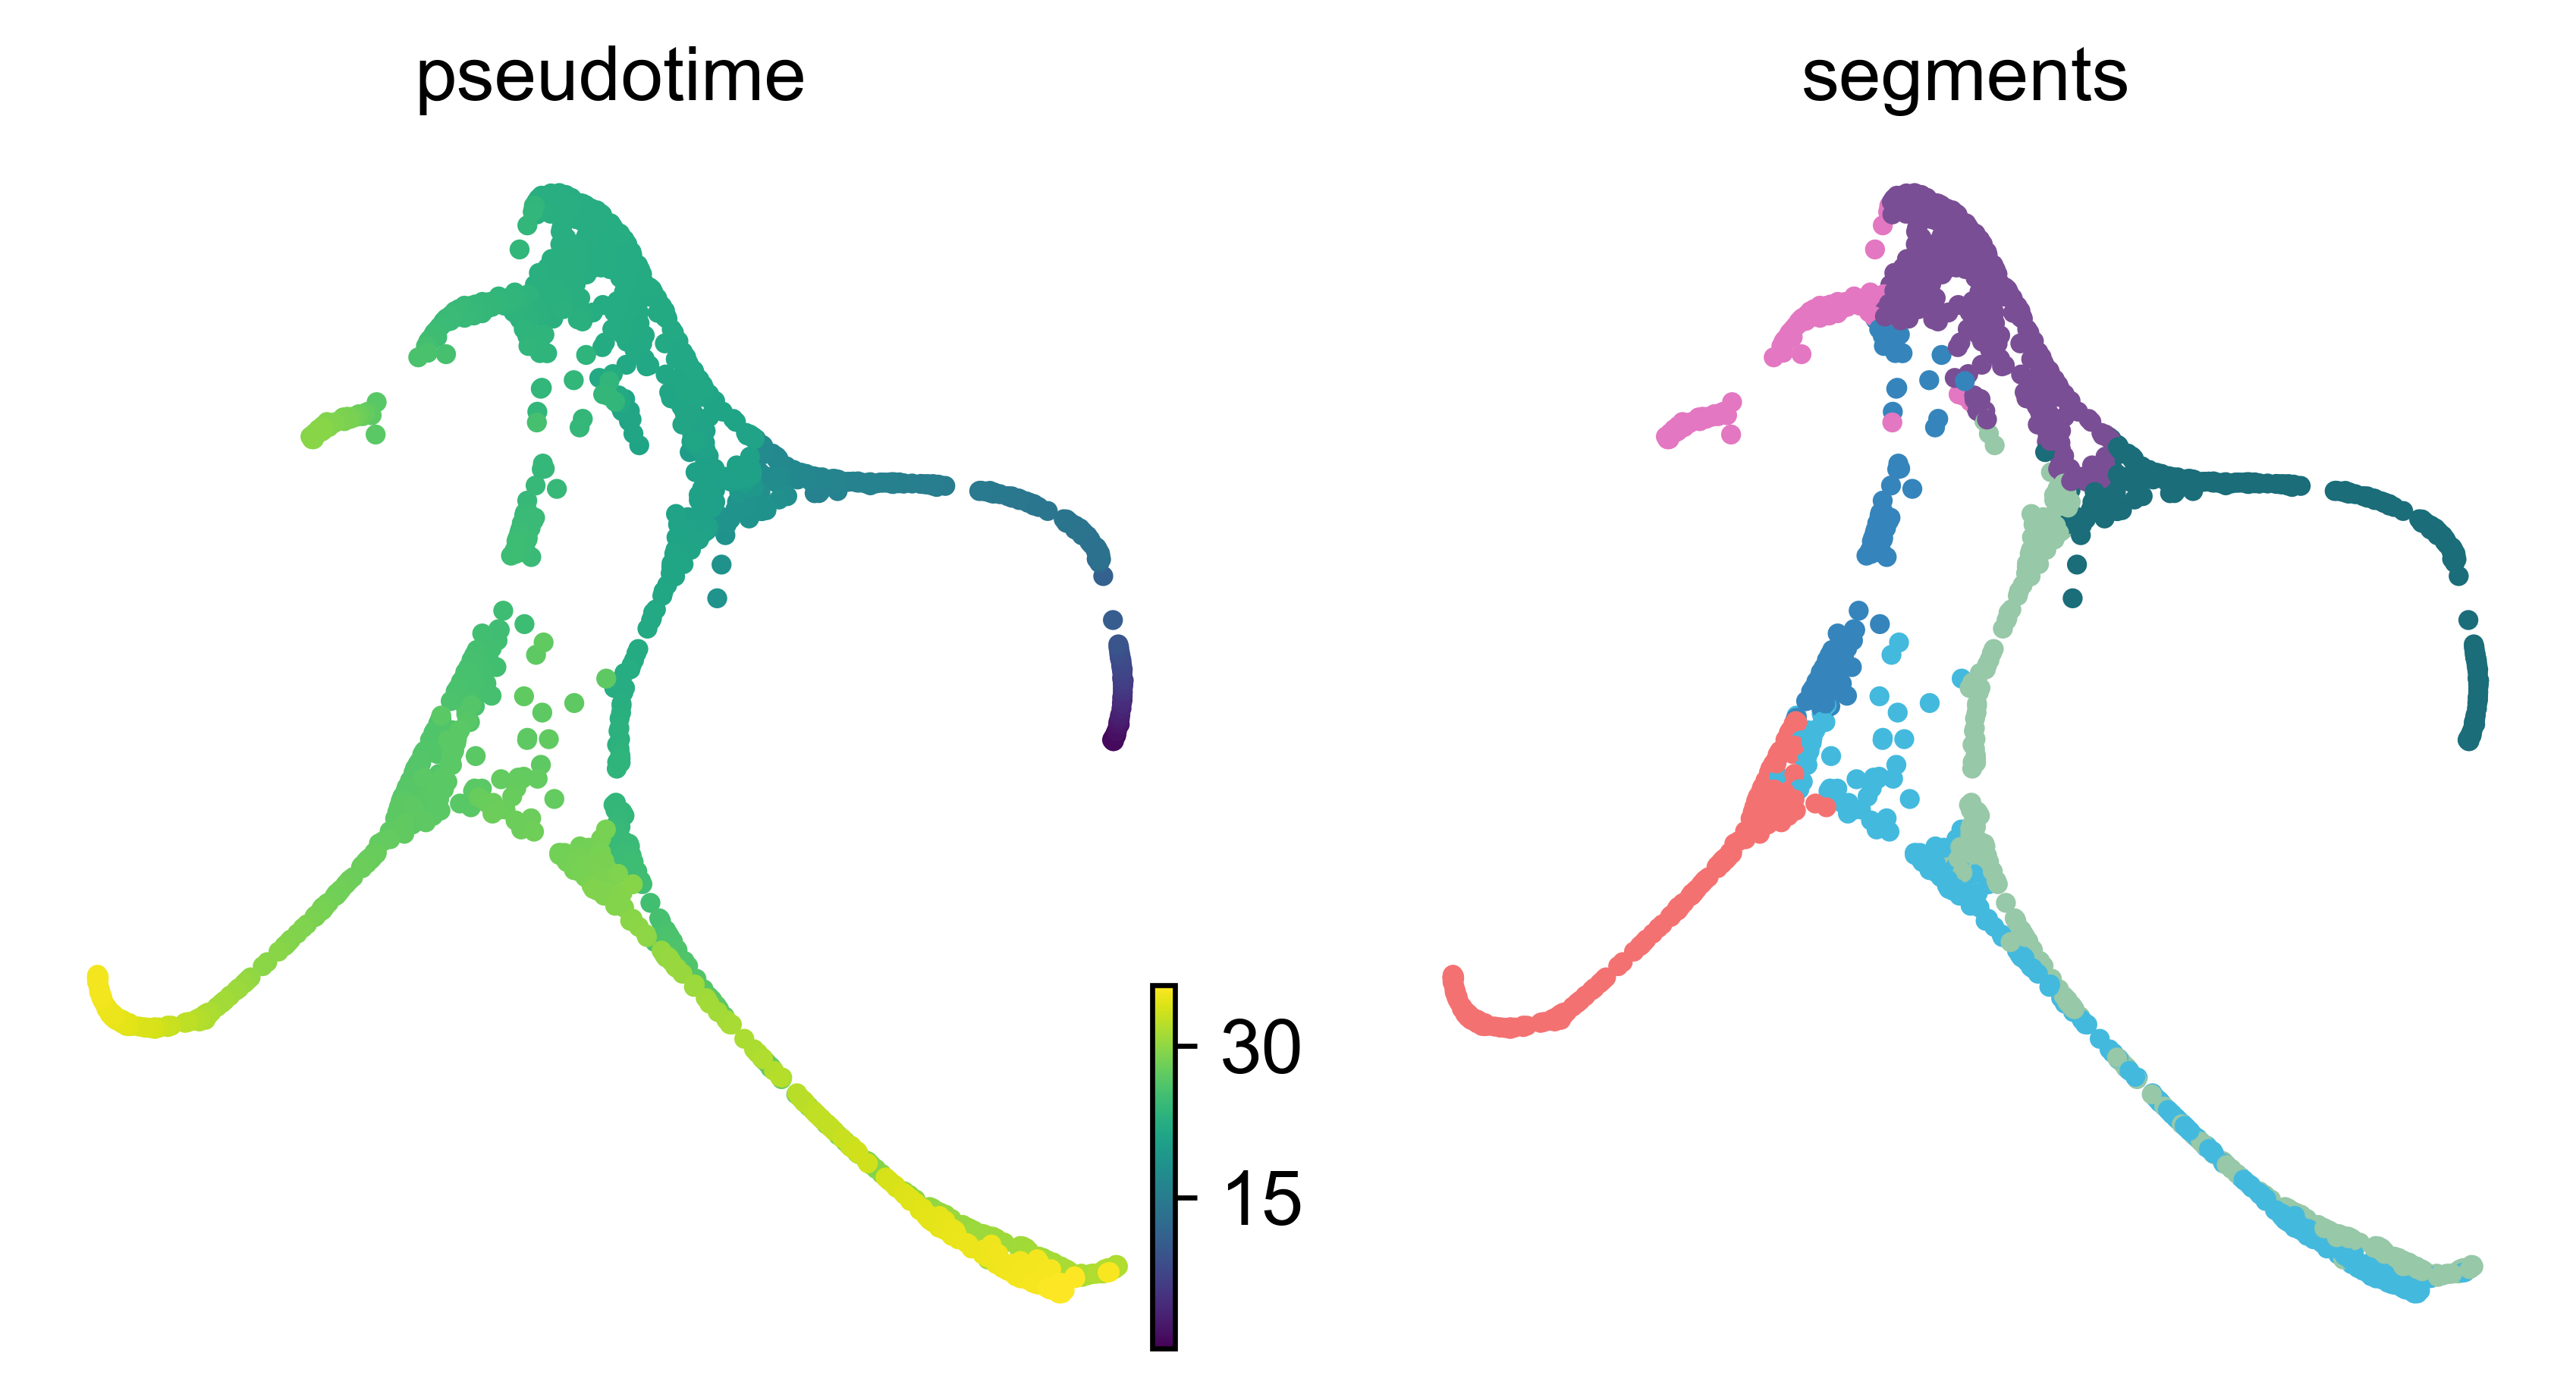

In [23]:
scv.set_figure_params(figsize=(3.5,3.5),dpi_save=300,)
scv.pl.draw_graph(adata,color=["t","seg"],cmap="viridis",title=["pseudotime","segments"],legend_loc="none",save="suppfig2.pdf",dpi=300)

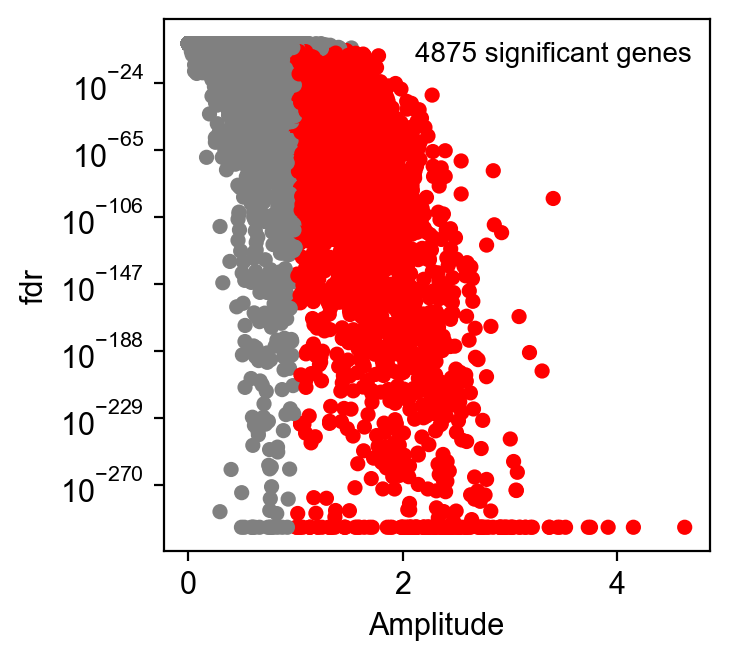

In [24]:
scv.set_figure_params(figsize=(3.5,3.5))
scf.pl.test_association(adata)
plt.text(4.7,0.1e-10,f"{adata.var.signi.sum()} significant genes",ha="right",fontsize=10)
plt.xlabel("Amplitude")
plt.savefig("figures/suppfig2-C.pdf",dpi=300)

In [25]:
import subprocess
import numpy as np
files=["figures/scvelo_suppfig2.pdf","figures/suppfig2-C.pdf"]
file=files[0]

def get_ratio(file):
    command=('identify %s'%file).split()
    arr=np.array(subprocess.check_output(command).decode("utf-8").split(" ")[2].split("x"),dtype=int)
    return arr[0]/arr[1]

ratios=np.array([get_ratio(file) for file in files])
sum_ratios=ratios.sum()

In [26]:
a,b=(ratios/sum_ratios)-0.01

In [27]:
b

0.3654254968705391

In [28]:
genes=["Slc17a7","Nsf","Syp","Stxbp1","Snap25","Grin1","Nefh","Cplx2","Stx1a"]

In [29]:
scf.tl.fit(adata,features=genes)

fit features associated with the trajectory
    single mapping : 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:06) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


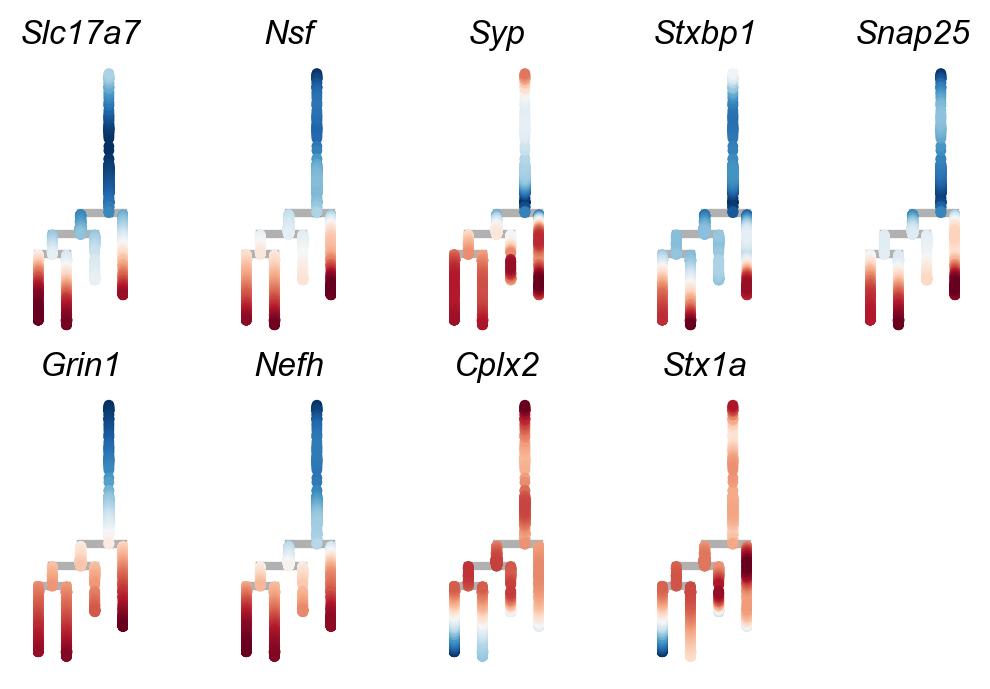

In [51]:
fig, axs = plt.subplots(2,5,figsize=(6,4),gridspec_kw=dict(wspace=1))
axs=axs.ravel()
for i,g in enumerate(genes):
    scf.pl.dendrogram(adata,color=g,show=False,ax=axs[i],tree_behind=True,show_info=False,layer="fitted",frameon=False)
    axs[i].set_title(g,style="italic")
axs[i+1].remove()
plt.savefig("figures/suppfig2-D.pdf",dpi=300)

In [43]:
fname = "suppfig2"

In [52]:
%%bash -s $fname $a $b
cat<<EOF >$1.tex
\documentclass{article}
\usepackage{geometry}
 \geometry{
 left=10mm,
 right=10mm,
 top=10mm,
 bottom=10mm,
 }

\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\pagenumbering{gobble}

\begin{document}
\setmainfont{Arial}

\large

\\raggedright \textbf{A} Tree learning in diffusion space, projected onto FA2 embedding and abstracted into a dendrogram
\center \includegraphics[width=.9\linewidth]{figures/suppfig2-A.pdf}

\begin{minipage}[t]{$2\textwidth}
\\raggedright \textbf{B} Assinged cell characteristics of the tree
\center \includegraphics[width=.9\linewidth]{figures/scvelo_suppfig2.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{$3\textwidth}
\\raggedright \textbf{C} Significantly changing features
\center \includegraphics[width=.9\linewidth]{figures/suppfig2-C.pdf}
\end{minipage}\hfill

\\raggedright \textbf{D} Plot of fitted markers on dendrogram representation
\center \includegraphics[width=.8\linewidth]{figures/suppfig2-D.pdf}

\clearpage
EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.aux 
convert -flatten -density 300 $1.pdf $1.jpg


identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppfig2.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-xdvipdfmx.def)))
(/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
(

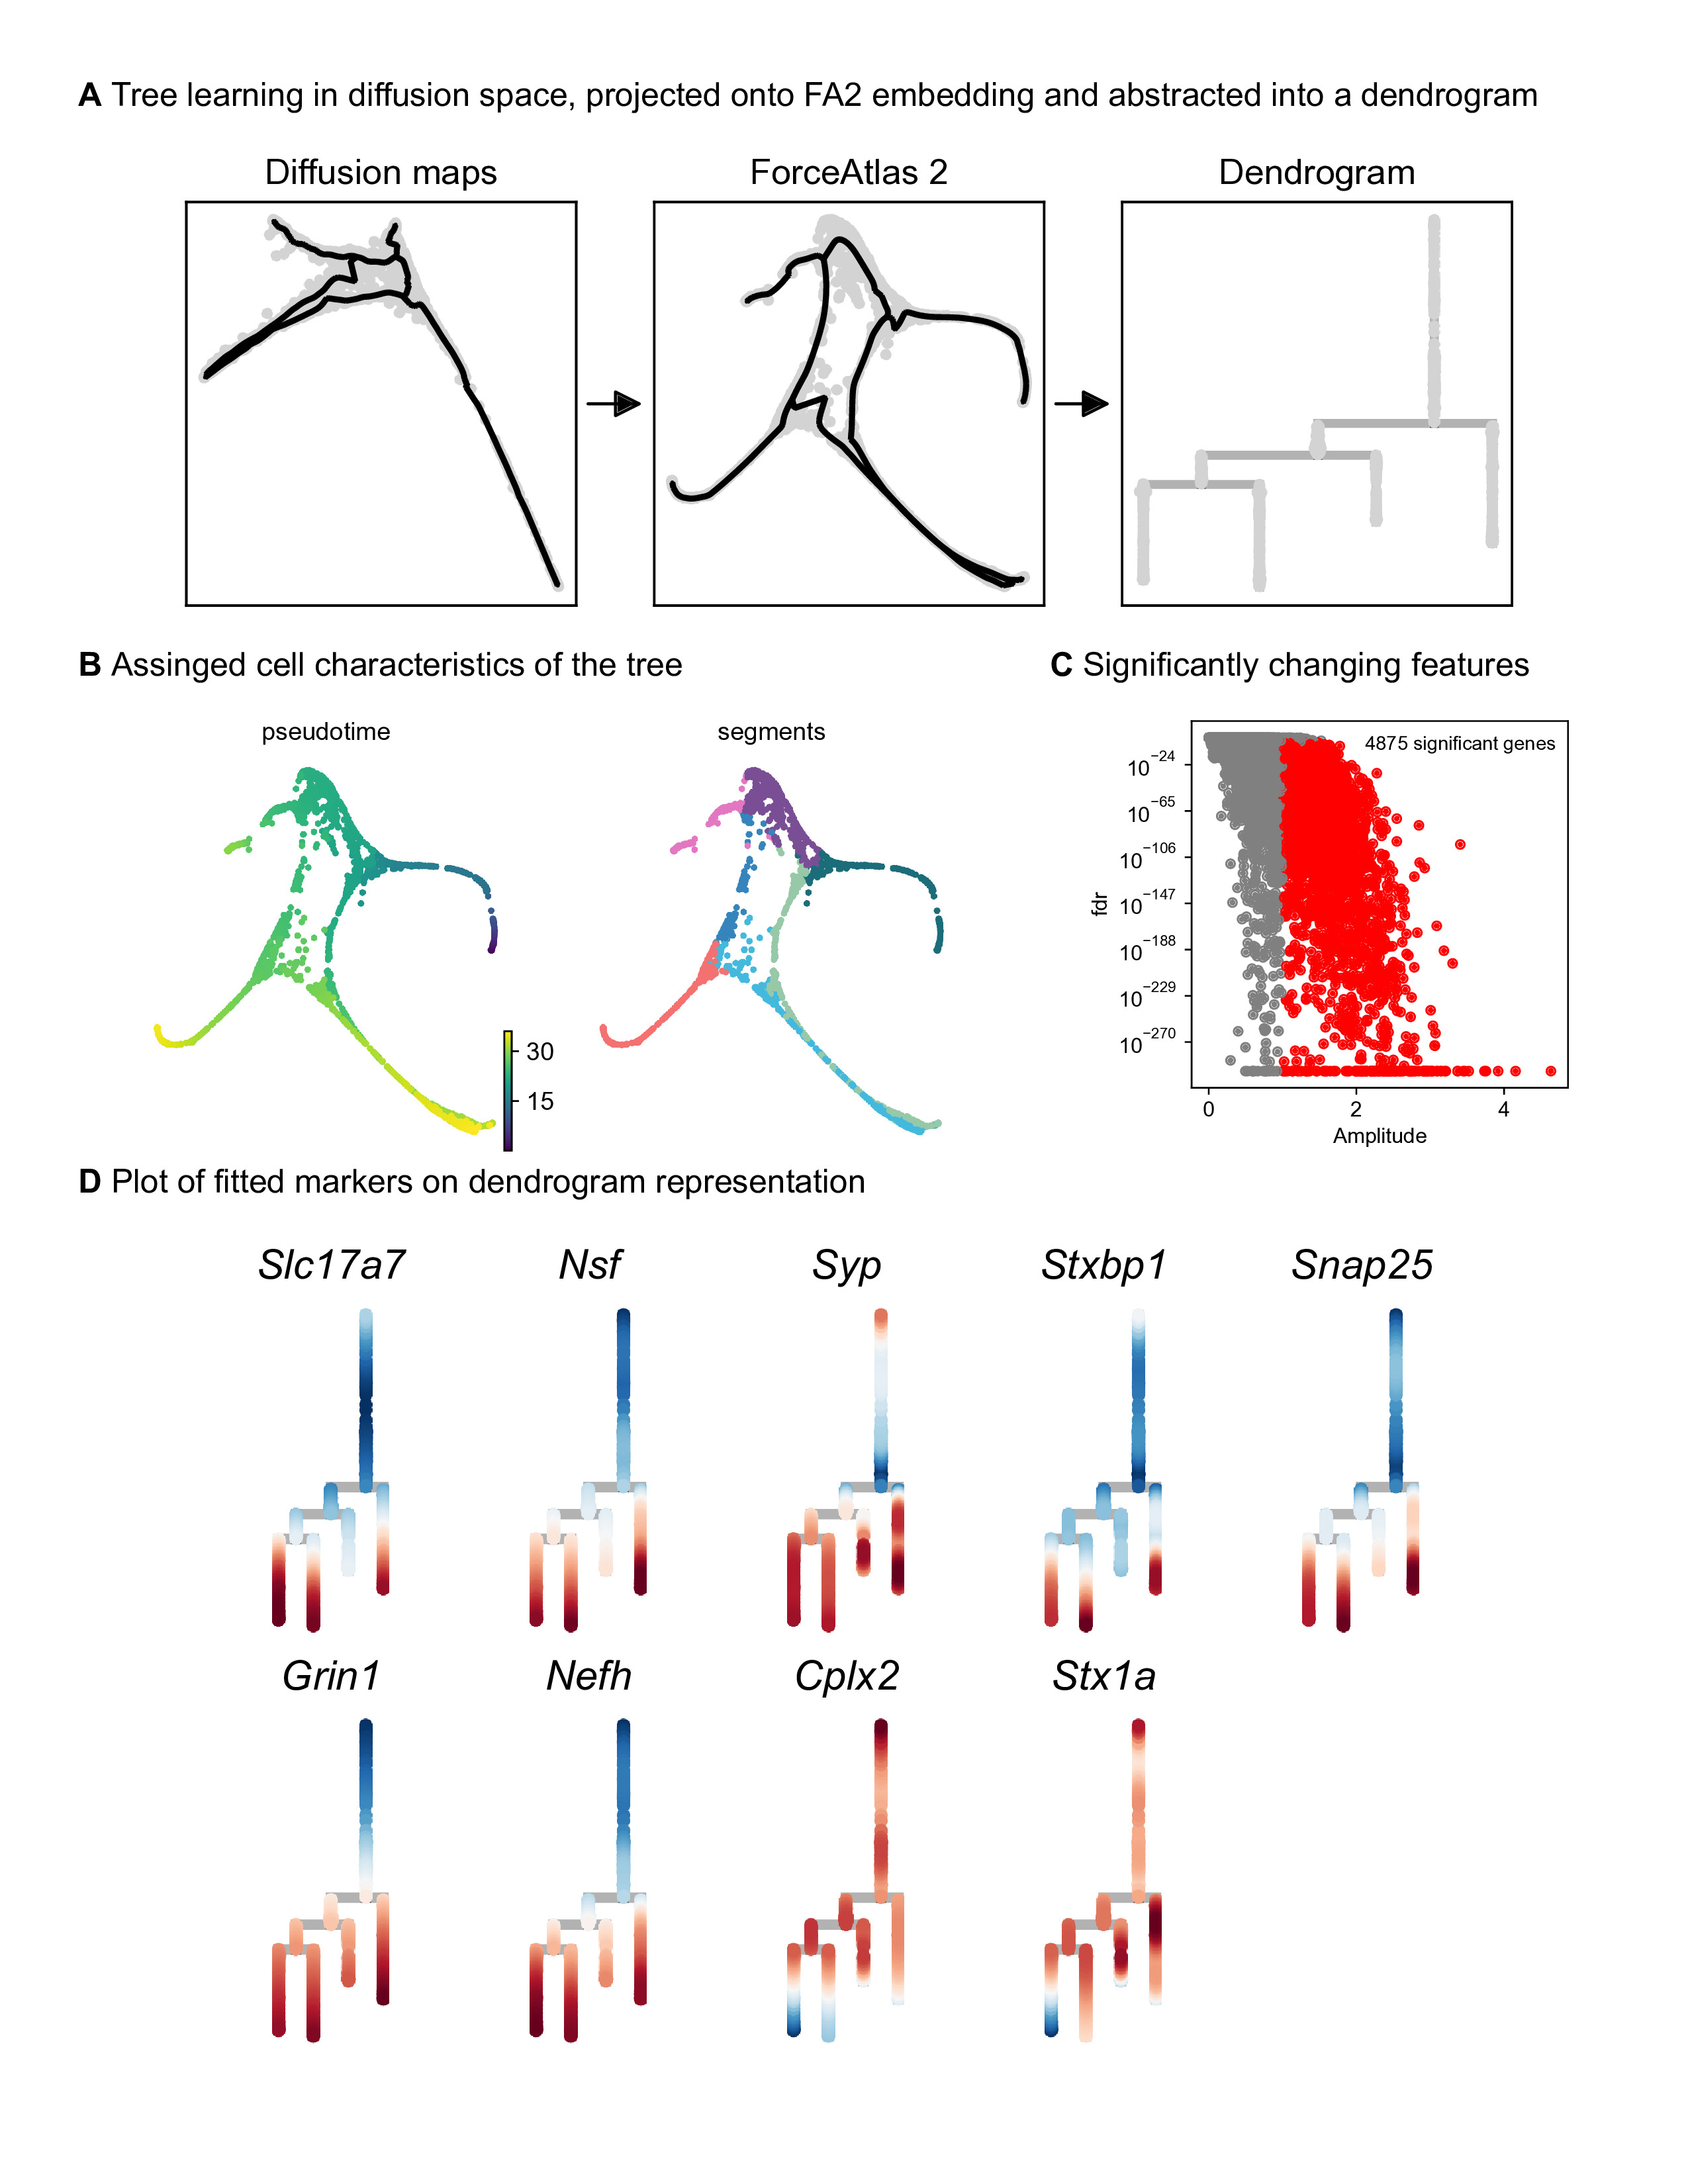

In [53]:
from IPython.display import Image
Image(filename=fname+'.jpg') 